# Business Understanding

In [55]:
#Optimize flights to reduce flight delays

# Data Understanding

In [56]:
# EDA (Exploratory data analysis)
import pandas as pd
df = pd.read_csv("combined.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,1987,11,19,4,657.0,655,821.0,804,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,1987,11,25,3,703.0,655,828.0,821,AA,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [57]:
df.shape

(22000, 30)

In [58]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [59]:
df.info() #describes datatypes and values of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22000 non-null  int64  
 1   Year               22000 non-null  int64  
 2   Month              22000 non-null  int64  
 3   DayofMonth         22000 non-null  int64  
 4   DayOfWeek          22000 non-null  int64  
 5   DepTime            22000 non-null  float64
 6   CRSDepTime         22000 non-null  int64  
 7   ArrTime            21919 non-null  float64
 8   CRSArrTime         22000 non-null  int64  
 9   UniqueCarrier      22000 non-null  object 
 10  FlightNum          22000 non-null  int64  
 11  TailNum            14000 non-null  object 
 12  ActualElapsedTime  21917 non-null  float64
 13  CRSElapsedTime     22000 non-null  float64
 14  AirTime            13950 non-null  float64
 15  ArrDelay           21917 non-null  float64
 16  DepDelay           220

In [60]:
df.describe() #statical summary

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,21919.000000,22000.000000,22000.000000,...,13996.000000,14000.000000,22000.0,0.0,22000.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000
mean,10999.500000,1997.500000,6.726591,15.919591,4.017909,1458.535955,1422.683364,1581.473014,1580.288636,1229.434182,...,6.626107,16.708357,0.0,NaN,0.003773,9.113570,2.116703,7.632465,0.045428,12.000196
std,6350.997297,6.344433,3.527147,8.717935,1.981814,461.390627,456.661388,510.355497,480.344615,1259.218437,...,25.262758,16.496407,0.0,NaN,0.061308,31.452014,14.602250,21.833752,1.418739,29.955382
min,0.000000,1987.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5499.750000,1992.000000,4.000000,8.000000,2.000000,1109.000000,1050.000000,1235.000000,1234.000000,419.000000,...,4.000000,10.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10999.500000,1997.500000,7.000000,16.000000,4.000000,1505.000000,1445.000000,1639.000000,1632.000000,869.000000,...,5.000000,14.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16499.250000,2003.000000,10.000000,23.000000,6.000000,1834.000000,1805.000000,2007.000000,1955.000000,1607.000000,...,7.000000,19.000000,0.0,NaN,0.000000,3.000000,0.000000,4.000000,0.000000,9.000000
max,21999.000000,2008.000000,12.000000,31.000000,7.000000,2400.000000,2359.000000,2440.000000,2359.000000,9581.000000,...,1449.000000,1332.000000,0.0,NaN,1.000000,619.000000,307.000000,320.000000,72.000000,350.000000


In [61]:
df.select_dtypes(include=['object']).columns #categorical column

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], dtype='object')

In [62]:
df.UniqueCarrier.unique()

array(['PI', 'HP', 'DL', 'AA', 'EA', 'NW', 'WN', 'PS', 'US', 'AS', 'UA',
       'CO', 'TW', 'PA (1)', 'ML (1)', 'MQ', 'AQ', 'DH', 'TZ', 'OO', 'EV',
       'B6', 'XE', 'FL', 'HA', 'OH', 'F9', 'YV', '9E'], dtype=object)

In [63]:
df.TailNum.unique()

array([nan, 'N869AA', 'N912VJ', ..., 'N103US', 'N234WN', 'N720WN'],
      dtype=object)

In [64]:
df.Origin.unique()

array(['MIA', 'LAX', 'BOS', 'DFW', 'SNA', 'DAY', 'RSW', 'ATL', 'MKE',
       'FLL', 'BWI', 'MEM', 'JFK', 'PHX', 'ORD', 'SLC', 'IAH', 'EWR',
       'MCO', 'ELP', 'LGA', 'BUR', 'LAS', 'MCI', 'DEN', 'OKC', 'SAN',
       'FAT', 'SEA', 'SFO', 'DAL', 'ROC', 'JAN', 'ROA', 'CLT', 'TLH',
       'PIT', 'RDU', 'DTW', 'CLE', 'ACV', 'HOU', 'PHL', 'DCA', 'STL',
       'MSP', 'MBS', 'IAD', 'CVG', 'ONT', 'BNA', 'TPA', 'LNK', 'PDX',
       'BUF', 'DSM', 'SHV', 'IND', 'GJT', 'OAK', 'LYH', 'SMF', 'MSY',
       'SDF', 'MLU', 'RNO', 'OMA', 'PWM', 'DAB', 'SJU', 'HRL', 'ALB',
       'PVD', 'LGB', 'RIC', 'MLB', 'HPN', 'LAN', 'CHA', 'BZN', 'ABQ',
       'CHS', 'ORF', 'CAE', 'BLI', 'AVL', 'PSP', 'SAT', 'PBI', 'MGM',
       'FLG', 'AUS', 'TYS', 'MFE', 'BIS', 'ANC', 'AVP', 'SBA', 'LEX',
       'MOT', 'MDT', 'BDL', 'SIT', 'CAK', 'JAX', 'MFR', 'HNL', 'PSC',
       'TUS', 'MDW', 'LIT', 'BFL', 'GRR', 'CCR', 'PNS', 'MRY', 'TUL',
       'GTF', 'SJC', 'BOI', 'ICT', 'SYR', 'CMH', 'UCA', 'COS', 'SPN',
       'SRQ', 'BGR',

In [65]:
df.Dest.unique()

array(['FLL', 'PHX', 'EWR', 'DEN', 'OAK', 'TPA', 'SMF', 'MIA', 'DTW',
       'SEA', 'BWI', 'LGA', 'BDL', 'SRQ', 'ELP', 'MSP', 'YUM', 'LAX',
       'SJC', 'PIT', 'MRY', 'ORD', 'RDU', 'SAN', 'ORF', 'SFO', 'ONT',
       'MKE', 'PDX', 'HOU', 'ATL', 'MCO', 'LAS', 'PHL', 'MCI', 'IAH',
       'BOS', 'DFW', 'IAD', 'TUL', 'RDD', 'HRL', 'BNA', 'CLT', 'RDM',
       'PVD', 'DAY', 'MFR', 'JFK', 'MYR', 'SLC', 'LIT', 'SUX', 'ISP',
       'SDF', 'DCA', 'ANC', 'OGG', 'OKC', 'SNA', 'BUF', 'GRR', 'FAY',
       'JAN', 'CLE', 'LGB', 'LBB', 'CHA', 'MEM', 'STL', 'BUR', 'GRB',
       'RNO', 'PWM', 'AUS', 'ABQ', 'TLH', 'PHF', 'JAX', 'MSY', 'ALB',
       'JAC', 'RIC', 'FAR', 'DAB', 'GEG', 'IND', 'CHO', 'CMH', 'SAV',
       'SAT', 'MGM', 'FAT', 'TYS', 'ROA', 'SYR', 'TRI', 'DLH', 'RSW',
       'CMI', 'HTS', 'BTR', 'ROC', 'SHV', 'PNS', 'EUG', 'STT', 'TUS',
       'MDW', 'TOL', 'MLI', 'PBI', 'MDT', 'BTV', 'SJU', 'OMA', 'COS',
       'BHM', 'MAF', 'MBS', 'CVG', 'GNV', 'BOI', 'CWA', 'GSO', 'UCA',
       'ERI', 'AMA',

# Hypothesis

In [66]:
# Data processing

In [67]:
df.isnull().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                 81
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum               8000
ActualElapsedTime       83
CRSElapsedTime           0
AirTime               8050
ArrDelay                83
DepDelay                 0
Origin                   0
Dest                     0
Distance                38
TaxiIn                8004
TaxiOut               8000
Cancelled                0
CancellationCode     22000
Diverted                 0
CarrierDelay         16893
WeatherDelay         16893
NASDelay             16893
SecurityDelay        16893
LateAircraftDelay    16893
dtype: int64

In [68]:
df.drop(['Unnamed: 0','CancellationCode'], axis=1, inplace= True) #delete two column

In [69]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,801,...,21.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,226,...,370.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,1987,11,19,4,657.0,655,821.0,804,PI,79,...,200.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,653,...,641.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,1987,11,25,3,703.0,655,828.0,821,AA,2277,...,371.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,2008,3,19,3,731.0,730,906.0,905,WN,2377,...,480.0,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
21996,2008,10,31,5,1541.0,1530,1636.0,1630,WN,570,...,248.0,2.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
21997,2008,2,15,5,1422.0,1200,1859.0,1650,AA,1567,...,1623.0,6.0,28.0,0,0,129.0,0.0,0.0,0.0,0.0
21998,2008,9,28,7,1644.0,1640,1746.0,1745,WN,246,...,304.0,2.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN


<Axes: >

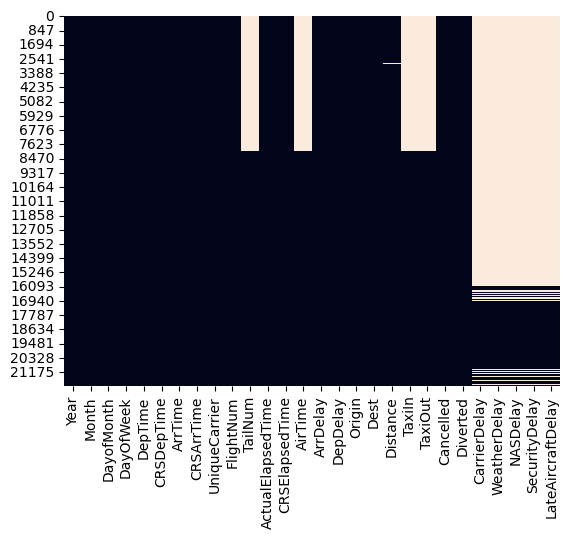

In [70]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar= False)

In [71]:
filtered_df = df[df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
                .apply(lambda row: all( x not in [None,''] and pd.notna(x) for x in row),
                axis=1)]

In [72]:
filtered_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
16003,2003,10,14,2,1612.0,1600,1927.0,1911,UA,1278,...,678.0,10.0,21.0,0,0,0.0,0.0,5.0,0.0,11.0
16004,2003,12,5,5,1445.0,1430,1537.0,1530,WN,33,...,239.0,2.0,5.0,0,0,0.0,0.0,0.0,0.0,0.0
16005,2003,6,18,3,1718.0,1715,1847.0,1857,CO,445,...,416.0,3.0,24.0,0,0,0.0,0.0,0.0,0.0,0.0
16008,2003,7,9,3,1354.0,1325,1548.0,1512,MQ,4006,...,137.0,3.0,27.0,0,0,0.0,0.0,9.0,0.0,27.0
16009,2003,12,20,6,1627.0,1620,1905.0,1905,WN,2312,...,588.0,5.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21992,2008,5,28,3,2142.0,2100,2258.0,2224,OO,6737,...,844.0,4.0,12.0,0,0,0.0,0.0,0.0,0.0,34.0
21993,2008,12,16,2,24.0,2325,818.0,722,B6,498,...,2496.0,16.0,14.0,0,0,0.0,0.0,0.0,0.0,56.0
21994,2008,4,3,4,1507.0,1445,1738.0,1653,US,1770,...,728.0,5.0,47.0,0,0,22.0,0.0,23.0,0.0,0.0
21997,2008,2,15,5,1422.0,1200,1859.0,1650,AA,1567,...,1623.0,6.0,28.0,0,0,129.0,0.0,0.0,0.0,0.0


In [73]:
filtered_df.shape

(5107, 28)

In [74]:
filtered_df.isnull().sum()

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
ArrTime              12
CRSArrTime            0
UniqueCarrier         0
FlightNum             0
TailNum               0
ActualElapsedTime    12
CRSElapsedTime        0
AirTime              12
ArrDelay             12
DepDelay              0
Origin                0
Dest                  0
Distance              0
TaxiIn                0
TaxiOut               0
Cancelled             0
Diverted              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
dtype: int64

In [75]:
filtered_df.dropna(inplace = True, axis=0)

C:\Users\ABC\AppData\Local\Temp\ipykernel_5340\3955178948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace = True, axis=0)


In [76]:
filtered_df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [77]:
filtered_df.shape

(5095, 28)

In [78]:
filtered_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
16003,2003,10,14,2,1612.0,1600,1927.0,1911,UA,1278,...,678.0,10.0,21.0,0,0,0.0,0.0,5.0,0.0,11.0
16004,2003,12,5,5,1445.0,1430,1537.0,1530,WN,33,...,239.0,2.0,5.0,0,0,0.0,0.0,0.0,0.0,0.0
16005,2003,6,18,3,1718.0,1715,1847.0,1857,CO,445,...,416.0,3.0,24.0,0,0,0.0,0.0,0.0,0.0,0.0
16008,2003,7,9,3,1354.0,1325,1548.0,1512,MQ,4006,...,137.0,3.0,27.0,0,0,0.0,0.0,9.0,0.0,27.0
16009,2003,12,20,6,1627.0,1620,1905.0,1905,WN,2312,...,588.0,5.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0


In [79]:
filtered_df.CarrierDelay.value_counts()

CarrierDelay
0.0      3729
7.0        51
6.0        50
15.0       49
20.0       48
         ... 
113.0       1
529.0       1
159.0       1
111.0       1
101.0       1
Name: count, Length: 167, dtype: int64

In [80]:
filtered_df.WeatherDelay.value_counts()

WeatherDelay
0.0      4852
10.0       11
9.0        10
20.0        9
13.0        8
         ... 
155.0       1
200.0       1
119.0       1
120.0       1
151.0       1
Name: count, Length: 99, dtype: int64

In [81]:
filtered_df.NASDelay.value_counts()

NASDelay
0.0      3580
5.0        80
1.0        70
2.0        62
3.0        61
         ... 
156.0       1
184.0       1
120.0       1
146.0       1
180.0       1
Name: count, Length: 144, dtype: int64

In [82]:
filtered_df.SecurityDelay.value_counts()

SecurityDelay
0.0     5085
18.0       2
8.0        2
17.0       1
13.0       1
61.0       1
10.0       1
7.0        1
72.0       1
Name: count, dtype: int64

In [83]:
filtered_df.LateAircraftDelay.value_counts()

LateAircraftDelay
0.0      3672
20.0       40
15.0       39
16.0       39
14.0       38
         ... 
62.0        1
195.0       1
171.0       1
161.0       1
184.0       1
Name: count, Length: 180, dtype: int64

In [84]:
df.drop(['WeatherDelay','SecurityDelay'], inplace= True, axis=1)

In [85]:
df.duplicated().sum()  #no duplicates

0